In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
(Xtrain,ytrain),(Xtest,ytest) = mnist.load_data()

In [5]:
Xtrain.shape

(60000, 28, 28)

In [6]:
ytrain.shape

(60000,)

In [7]:
Xtest.shape

(10000, 28, 28)

In [8]:
ytest.shape

(10000,)

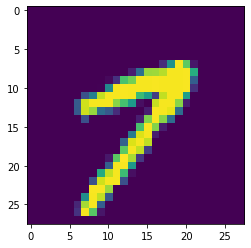

In [9]:
plt.imshow(Xtrain[79])

In [10]:
from tensorflow.keras import utils as np_utils

In [11]:
ytrain = np_utils.to_categorical(ytrain,10)

In [12]:
ytest = np_utils.to_categorical(ytest,10)

In [13]:
ytrain.shape

(60000, 10)

In [14]:
ytest.shape

(10000, 10)

In [15]:
mean = np.mean(Xtrain)

In [16]:
std = np.std(Xtrain)

In [17]:
Xtrain = Xtrain - mean/std

In [18]:
Xtest = Xtest - mean/std

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, BatchNormalization, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2

In [20]:
model = Sequential()
model.add(Conv2D(filters = 64 , kernel_size = (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [22]:
from tensorflow.keras.optimizers import Adam

In [23]:
model.compile(Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics =['accuracy'])

In [24]:
Xtrain = Xtrain.reshape(-1,28,28,1)
Xtest = Xtest.reshape(-1,28,28,1)

In [26]:
history = model.fit(Xtrain, ytrain,validation_split = 0.20, epochs = 15, batch_size = 32, verbose =2)
history

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 - 27s - loss: 0.0451 - accuracy: 0.9870 - val_loss: 0.0110 - val_accuracy: 0.9970
Epoch 2/15
48000/48000 - 27s - loss: 0.0437 - accuracy: 0.9872 - val_loss: 0.0108 - val_accuracy: 0.9968
Epoch 3/15
48000/48000 - 26s - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0094 - val_accuracy: 0.9974
Epoch 4/15
48000/48000 - 26s - loss: 0.0425 - accuracy: 0.9876 - val_loss: 0.0134 - val_accuracy: 0.9954
Epoch 5/15
48000/48000 - 26s - loss: 0.0440 - accuracy: 0.9879 - val_loss: 0.0223 - val_accuracy: 0.9937
Epoch 6/15
48000/48000 - 27s - loss: 0.0408 - accuracy: 0.9892 - val_loss: 0.0220 - val_accuracy: 0.9950
Epoch 7/15
48000/48000 - 26s - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0179 - val_accuracy: 0.9952
Epoch 8/15
48000/48000 - 26s - loss: 0.0413 - accuracy: 0.9883 - val_loss: 0.0195 - val_accuracy: 0.9945
Epoch 9/15
48000/48000 - 27s - loss: 0.0433 - accuracy: 0.9874 - val_loss: 0.0235 - val_accuracy: 0.9940
Epoch

<function matplotlib.pyplot.legend(*args, **kwargs)>

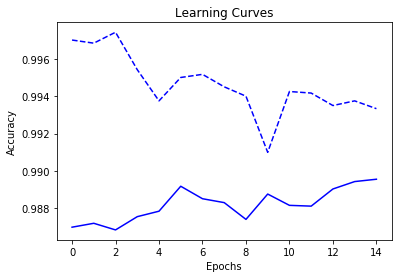

In [29]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(train_acc, 'b-', label = 'train data')
plt.plot(val_acc, 'b--', label = 'validation data')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

In [31]:
model.evaluate(Xtest,ytest)

10000/10000 [==============================] - 3s 321us/sample - loss: 0.0455 - accuracy: 0.9905


[0.04548316483587226, 0.9905]

In [32]:
model.save('LiveProject.h5')

In [33]:
import os

In [34]:
os.getcwd()

'C:\\Users\\Ilyas'